# 8

# In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

# (a): TODO Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100. 

In [325]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import (Stepwise,sklearn_selected,sklearn_selection_path,poly)


from l0bnb import fit_path

In [326]:
rng=np.random.default_rng(1)

x=rng.normal(0,1,size=100)

x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

In [327]:
epsilon=rng.normal(0,1,size=100)
epsilon

array([-6.51281012e-01,  8.62444796e-01, -1.25592084e-01,  6.69153241e-01,
        1.21884361e+00,  3.82929583e-01, -8.75721143e-01, -1.51431863e+00,
        1.75338412e+00, -1.11292193e-01, -6.88564948e-01,  1.44257088e-01,
       -1.91411330e-01,  8.52142264e-01,  3.39281824e-02,  1.37495836e-02,
       -7.14579721e-01,  4.69568099e-01, -1.03386672e+00,  6.65889440e-01,
        1.52393751e+00, -1.52468604e+00, -2.46622923e+00,  6.16878755e-01,
        2.54789782e+00, -1.00092485e+00, -1.25069576e+00,  5.88968934e-01,
       -8.40721590e-01, -5.06025484e-01, -3.48117467e-01,  5.32002086e-01,
       -4.05302361e-01,  2.77882840e-01, -1.76533259e-01, -8.44671104e-01,
       -3.19826258e-01, -9.50399665e-01,  6.51498587e-03, -1.12386623e+00,
       -1.09289437e+00,  1.45696182e+00, -5.31842203e-02, -5.39020255e-02,
        5.11536420e-01, -4.20857003e-01, -2.28535367e-01,  4.25148735e-01,
        2.82415842e-01, -1.15929673e+00,  8.33342597e-01, -5.90434943e-01,
       -1.05607895e+00, -

# (b) TODO Generate a response vector Y of length n = 100 according to
the model 
$$
Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon
$$
where $\beta_0,\beta_1,\beta_2,\beta_3$ are constants of your choice.

In [328]:
beta_0=1
beta_1=2
beta_2=3
beta_3=4

Y=beta_0+beta_1*x+beta_2*x**2+beta_3*x**3+epsilon

Y

array([ 1.56326299e+00,  7.74940446e+00,  2.00716798e+00, -4.69468920e+00,
        9.45693251e+00,  3.22919050e+00, -7.03926084e-01,  2.44598260e+00,
        4.07509370e+00,  1.83830080e+00,  3.70794847e-01,  3.78800764e+00,
       -6.34932209e-01,  1.58864703e+00,  3.18753267e-01,  4.14631759e+00,
        3.69848733e-01,  1.04119103e+00, -1.67571654e+00,  1.28189765e+00,
        2.54042292e+00, -9.31756801e-01,  1.48138649e+01,  1.07520445e+01,
       -5.95357575e+01, -2.00366389e+01, -5.29957943e-01,  9.78309455e-01,
        7.62499908e-01,  1.11136028e+00,  5.63393518e+01, -2.48272471e+00,
        5.18801911e-02,  5.19794296e+01,  4.45341586e+00,  3.96648605e+00,
       -9.84385275e-02, -1.30037839e+01,  1.44436362e+00,  1.34996287e-01,
       -5.42391777e+00,  1.21518731e+00,  8.16803585e-01, -1.63871190e+00,
        1.34017148e+00,  8.00942156e-01,  8.46616510e-01,  6.62445668e-01,
        4.36479442e+00,  6.83655549e+00,  2.91598727e+00, -1.40961614e+00,
        4.57982877e+00, -

# (c) TODO Use forward stepwise selection in order to select a model containing the predictors X, X2, . . . , X10. What is the model obtained according to Cp? Report the coefficients of the model obtained.

In [329]:
def nCp(sigma2,estimator,X,Y):
    n,p=X.shape
    Yhat=estimator.predict(X)
    RSS=np.sum((Y-Yhat)**2)

    return -(RSS+2*p*sigma2)/n

In [330]:
sigma2=OLS(Y,x).fit().scale
sigma2

49.629677128385396

In [331]:
X_poly=pd.DataFrame()

for i in range(1,11):
    X_poly[f'x{i}']=x**i

X_poly

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [332]:
design=MS(X_poly.columns).fit(X_poly)

design

,terms,"Index(['x1', ...type='object')"
,intercept,True
,categorical_features,None
,categorical_encoders,{}


In [333]:
neg_Cp=partial(nCp,sigma2)

In [334]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [335]:
data_Cp=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_Cp.fit(X_poly,Y)

In [336]:
print("Selected features: ",data_Cp.selected_state_)


Selected features:  ('x1', 'x2', 'x3')


In [337]:
coefficients=data_Cp.results_.params
print("Coefficients: ",coefficients)

Coefficients:  intercept    0.942803
x1           2.114584
x2           2.952906
x3           3.935700
dtype: float64


In [338]:
print("Model Summary",data_Cp.results_.summary())

Model Summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4333.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          2.64e-102
Time:                        16:47:21   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9428      0.120      

In [339]:
strategy_path=Stepwise.fixed_steps(design,len(design.terms),direction='forward')
full_path=sklearn_selection_path(OLS,strategy=strategy_path,scoring=neg_Cp)
full_path.fit(X_poly,Y)

In [340]:
# 获取每一步的预测结果
Yhat_path = full_path.predict(X_poly)  # shape: (n_samples, n_steps)

# 计算每一步的 Cp
n = len(Y)
path_scores = []

for step in range(Yhat_path.shape[1]):
    # 获取当前步骤的预测
    Yhat_step = Yhat_path[:, step]
    
    # 计算 RSS
    RSS = np.sum((Y - Yhat_step)**2)
    
    # 获取当前步骤选择的特征数量（包括截距）
    # 需要从 full_path 获取当前步骤的状态
    # 或者通过计算非零系数来推断
    
    # 计算 Cp（注意：这里 p 包括截距，所以是 step+1）
    p = step + 1  # 假设每一步增加一个特征
    Cp = (RSS + 2 * p * sigma2) / n
    
    path_scores.append(Cp)

# 打印结果
for step, cp in enumerate(path_scores):
    print(f"Step {step+1}: Cp = {cp:.4f}")

Step 1: Cp = 133.5702
Step 2: Cp = 13.8452
Step 3: Cp = 5.2376
Step 4: Cp = 4.9422
Step 5: Cp = 5.8347
Step 6: Cp = 6.8191
Step 7: Cp = 7.8046
Step 8: Cp = 8.7931
Step 9: Cp = 9.7828
Step 10: Cp = 10.7708
Step 11: Cp = 11.7536


# (d) TODO Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [341]:
strategy=Stepwise.first_peak(
    design,
    direction='backward',
    max_terms=len(design.terms)
)

In [342]:
data_Cp=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_Cp.fit(X_poly,Y)

In [343]:
print("Selected features: ",data_Cp.selected_state_)


Selected features:  ()


In [344]:
coefficients=data_Cp.results_.params
print("Coefficients: ",coefficients)

Coefficients:  intercept    1.333219
dtype: float64


In [345]:
print("Model Summary",data_Cp.results_.summary())

Model Summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                nan
Time:                        16:47:21   Log-Likelihood:                -386.25
No. Observations:                 100   AIC:                             774.5
Df Residuals:                      99   BIC:                             777.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3332      1.157      

In [346]:
strategy_path=Stepwise.fixed_steps(design,len(design.terms),direction='backward')
full_path=sklearn_selection_path(OLS,strategy=strategy_path,scoring=neg_Cp)
full_path.fit(X_poly,Y)

In [347]:
# 获取每一步的预测结果
Yhat_path = full_path.predict(X_poly)  # shape: (n_samples, n_steps)

# 计算每一步的 Cp
n = len(Y)
path_scores = []

for step in range(Yhat_path.shape[1]):
    # 获取当前步骤的预测
    Yhat_step = Yhat_path[:, step]
    
    # 计算 RSS
    RSS = np.sum((Y - Yhat_step)**2)
    
    # 获取当前步骤选择的特征数量（包括截距）
    # 需要从 full_path 获取当前步骤的状态
    # 或者通过计算非零系数来推断
    
    # 计算 Cp（注意：这里 p 包括截距，所以是 step+1）
    p = step + 1  # 假设每一步增加一个特征
    Cp = (RSS + 2 * p * sigma2) / n
    
    path_scores.append(Cp)

# 打印结果
for step, cp in enumerate(path_scores):
    print(f"Step {step+1}: Cp = {cp:.4f}")

Step 1: Cp = 133.5702


# <small> Obviously, backward removes all features. </small>

# (e) TODO Now fit a lasso model to the simulated data, again using X, X2. . . , X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the sults obtained.

In [348]:
X_poly.shape

(100, 10)

In [349]:
Xs=(X_poly-X_poly.mean(axis=0))/X_poly.std(axis=0)
Xs.shape

(100, 10)

In [350]:
lambdas=10**np.linspace(8,-2,100)/Y.std()

soln_array=skl.ElasticNet.path(Xs,Y,l1_ratio=1,alphas=lambdas)[1]

soln_array.shape

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e+00, tolerance: 1.344e+00
  model = cd_fast.enet_coordinate_descent_gram(


(10, 100)

In [351]:
soln_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [352]:
soln_path=pd.DataFrame(soln_array.T,columns=X_poly.columns,index=-np.log(lambdas))

soln_path.index.name='negative log(lambda)'

soln_path

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
negative log(lambda),,,,,,,,,,
-15.977097,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.744512,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.511928,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.279344,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.046759,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...
6.118417,1.663083,3.451390,11.266889,-0.399236,0.804848,0.0,0.0,0.000000,-0.0,1.102465
6.351001,1.676784,3.466117,11.202242,-0.434935,0.884542,0.0,0.0,0.000000,-0.0,1.153546
6.583586,1.688831,3.478268,11.144887,-0.468721,0.954737,0.0,0.0,0.020046,-0.0,1.180873


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/1241712015.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


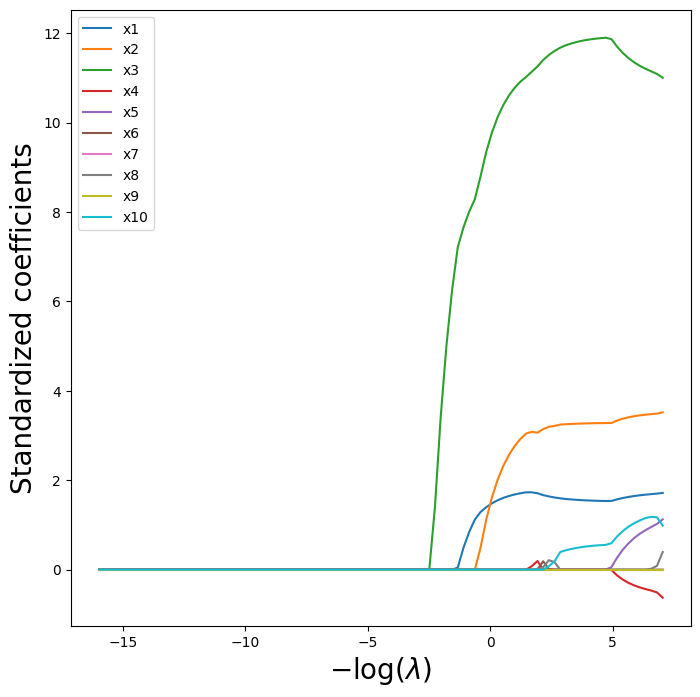

In [353]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

# Grid search of lambda

In [354]:
lasso=skl.ElasticNet(l1_ratio=1)
scaler=StandardScaler(with_mean=True,with_std=True)

pipe=Pipeline([('scaler',scaler),('lasso',lasso)])

pipe.fit(X_poly,Y)

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [355]:
param_grid={'lasso__alpha':lambdas}
validation=skm.ShuffleSplit(n_splits=1,test_size=0.5,random_state=0)
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=validation,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y)

grid.best_params_['lasso__alpha']
grid.best_estimator_


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e-01, tolerance: 1.499e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.382e-01, tolerance: 1.499e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.00888926586343231
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [356]:
K=5
kfold=skm.KFold(K,random_state=0,shuffle=True)

In [357]:
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y)
grid.best_params_['lasso__alpha']
grid.best_estimator_

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+00, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e-01, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.0035061096282501952
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [358]:
# 诊断代码 - 检查数据
print("MSE值范围:")
print(f"最小值: {-grid.cv_results_['mean_test_score'].max()}")
print(f"最大值: {-grid.cv_results_['mean_test_score'].min()}")
print(f"是否有NaN: {np.isnan(-grid.cv_results_['mean_test_score']).any()}")
print(f"是否有Inf: {np.isinf(-grid.cv_results_['mean_test_score']).any()}")

print("\nLambda范围:")
print(f"最小值: {-np.log(lambdas).min()}")
print(f"最大值: {-np.log(lambdas).max()}")

# 检查数据形状
print(f"\n数据形状: {grid.cv_results_['mean_test_score'].shape}")
print(f"Lambdas形状: {lambdas.shape}")

MSE值范围:
最小值: 1.1142555757414871
最大值: 133.9042164176509
是否有NaN: False
是否有Inf: False

Lambda范围:
最小值: 7.048754341184417
最大值: -15.977096588756039

数据形状: (100,)
Lambdas形状: (100,)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/3353443062.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

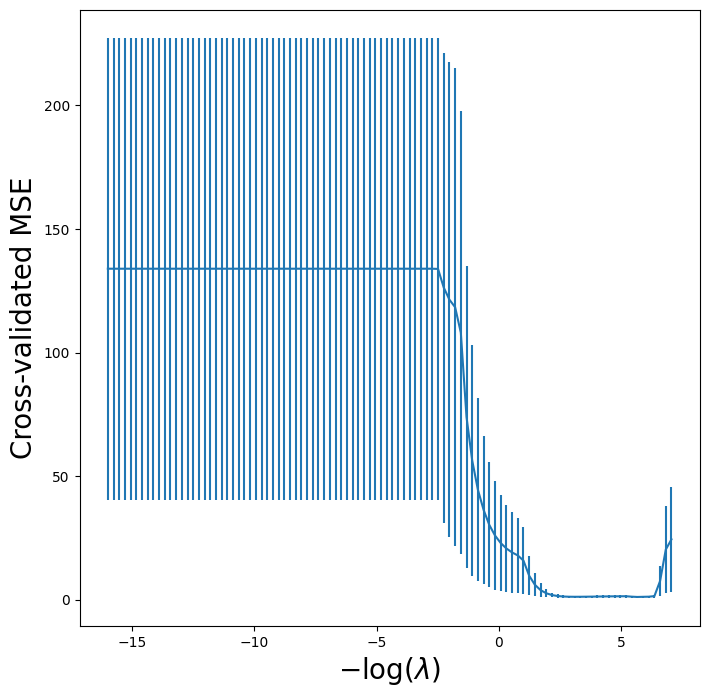

In [359]:
lasso_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [360]:
grid_r2=skm.GridSearchCV(pipe,param_grid,cv=kfold)
grid_r2.fit(X_poly,Y)


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+00, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e-01, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Pipeline(step...l1_ratio=1))])
,param_grid,{'lasso__alpha': array([8.6849...68490126e-04])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/2204943169.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated $R^2$')

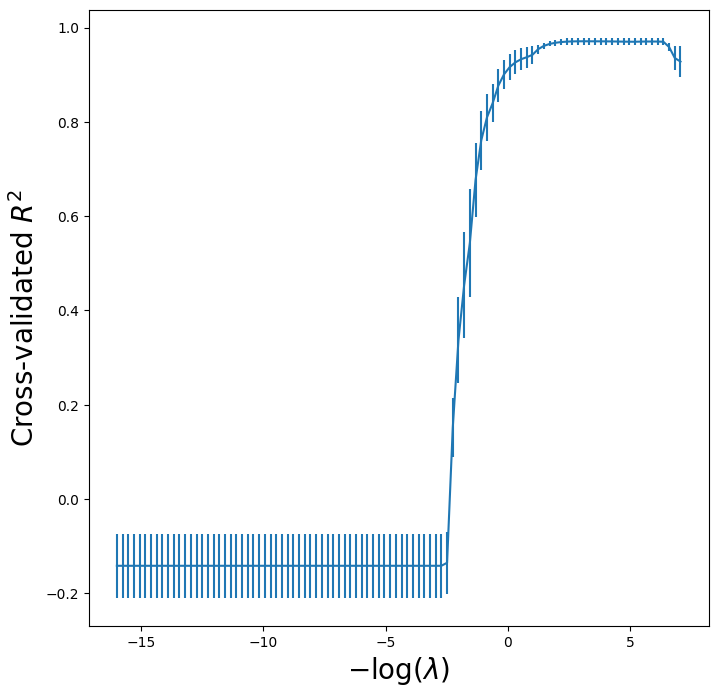

In [361]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20)

In [362]:
# 报告最优模型的系数估计
best_lasso = grid.best_estimator_.named_steps['lasso']
coefficients = pd.Series(best_lasso.coef_, index=X_poly.columns)
coefficients['intercept'] = best_lasso.intercept_

print("=" * 60)
print("最优Lasso模型结果")
print("=" * 60)
print(f"最优λ值: {grid.best_params_['lasso__alpha']:.6f}")
print(f"-log(λ): {-np.log(grid.best_params_['lasso__alpha']):.4f}")
print(f"\n系数估计:")
print(coefficients)
print(f"\n选择的变量 (非零系数):")
selected_vars = coefficients[coefficients != 0]
print(selected_vars)
print(f"\n真实模型系数: β₀=1, β₁=2, β₂=3, β₃=4")

最优Lasso模型结果
最优λ值: 0.003506
-log(λ): 5.6532

系数估计:
x1            1.664918
x2            3.357250
x3           11.165340
x4           -0.272564
x5            0.835530
x6           -0.000000
x7            0.000000
x8            0.000000
x9           -0.000000
x10           1.038695
intercept     1.333219
dtype: float64

选择的变量 (非零系数):
x1            1.664918
x2            3.357250
x3           11.165340
x4           -0.272564
x5            0.835530
x10           1.038695
intercept     1.333219
dtype: float64

真实模型系数: β₀=1, β₁=2, β₂=3, β₃=4


# (f) TODO Now generate a response vector Y according to the model
$$
Y=\beta_0+\beta_7X^7+\epsilon
$$
# and perform forward stepwise selection and the lasso. Discuss the results obtained.



In [363]:
beta_7=1

Y_new=beta_0+beta_7*x**7+epsilon

Y_new

array([ 3.49307665e-01,  2.11519420e+00,  8.74838067e-01, -4.71315432e+00,
        2.71742405e+00,  1.38646057e+00,  1.11409547e-01, -4.91939108e-01,
        2.75424014e+00,  8.88898266e-01,  3.11435052e-01,  1.15885584e+00,
        6.91093575e-01,  1.85213922e+00,  1.02787363e+00,  1.04136853e+00,
        2.85420279e-01,  1.46938511e+00, -2.12553079e-01,  1.66581500e+00,
        2.52393751e+00, -5.24806816e-01,  4.61077940e+00,  2.66490922e+00,
       -1.07313749e+03, -8.58320929e+01, -2.50700740e-01,  1.58657805e+00,
        1.59298725e-01,  4.93997410e-01,  1.91747285e+02, -5.70760652e-01,
        5.93603017e-01,  1.49713694e+02,  8.70774689e-01,  2.11677774e-01,
        6.70694371e-01, -3.29751175e+01,  1.00651868e+00, -1.23866045e-01,
       -4.28839776e+00,  2.38746680e+00,  9.46815770e-01,  2.74323455e-01,
        1.51153633e+00,  5.79143070e-01,  7.71464633e-01,  1.41662156e+00,
        1.30843034e+00,  2.87092307e-01,  1.83369262e+00,  1.64021447e-01,
        5.61572945e-02,  

In [364]:
X_poly

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [365]:
sigma2=OLS(Y_new,x).fit().scale
sigma2

10170.941872631554

In [366]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [367]:
data_MSE=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_MSE.fit(X_poly,Y_new)
data_MSE.selected_state_

('x7',)

In [368]:
data_MSE.results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.341e+06
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.70e-204
Time:                        16:47:23   Log-Likelihood:                -139.12
No. Observations:                 100   AIC:                             282.2
Df Residuals:                      98   BIC:                             287.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9048      0.099      9.155      0.000       0.709       1.101
x7             0.9983      0.001   1158.014      0.000       0.997       1.000
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.479
Skew:                          -0.035   Prob(JB):                        0.787
Kurtosis:                       3.332   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [369]:
lambdas=10**np.linspace(8,-2,100)/Y_new.std()

soln_array=skl.ElasticNet.path(Xs,Y_new,l1_ratio=1,alphas=lambdas)[1]

soln_array.shape

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+02, tolerance: 1.308e+02
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.312e+02, tolerance: 1.308e+02
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

(10, 100)

In [370]:
soln_path=pd.DataFrame(soln_array.T,columns=X_poly.columns,index=-np.log(lambdas))

soln_path.index.name='negative log(lambda)'

soln_path

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
negative log(lambda),,,,,,,,,,
-13.686433,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-13.453848,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-13.221264,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-12.988679,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-12.756095,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...
8.409081,0.089128,0.042488,-1.357244,-1.052580,3.582926,0.699564,111.970393,0.571399,0.343620,-0.004182
8.641665,0.092231,0.076962,-1.371182,-1.230792,3.546359,0.896070,112.034013,0.615408,0.371159,-0.057261
8.874250,0.096574,0.112959,-1.396998,-1.417785,3.546188,1.112455,112.085410,0.670406,0.364659,-0.154653


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/1241712015.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


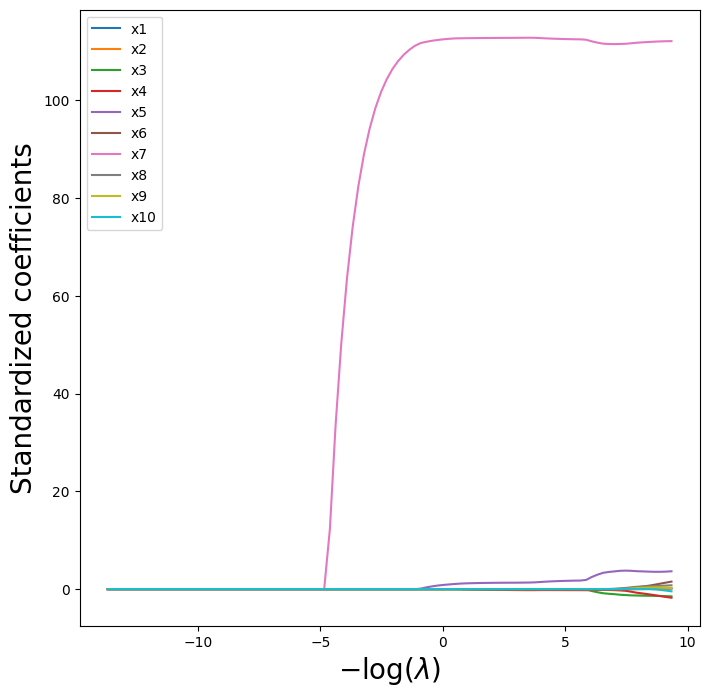

In [371]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [372]:
lasso=skl.ElasticNet(l1_ratio=1)
scaler=StandardScaler(with_mean=True,with_std=True)

pipe=Pipeline([('scaler',scaler),('lasso',lasso)])

pipe.fit(X_poly,Y_new)

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [373]:
param_grid={'lasso__alpha':lambdas}
validation=skm.ShuffleSplit(n_splits=1,test_size=0.5,random_state=0)
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=validation,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y_new)

grid.best_params_['lasso__alpha']
grid.best_estimator_


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.645e-01, tolerance: 8.759e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+00, tolerance: 8.759e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.18935442665691876
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [374]:
K=5
kfold=skm.KFold(K,random_state=0,shuffle=True)

In [375]:
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y_new)
grid.best_params_['lasso__alpha']
grid.best_estimator_

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.18935442665691876
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [376]:
# 诊断代码 - 检查数据
print("MSE值范围:")
print(f"最小值: {-grid.cv_results_['mean_test_score'].max()}")
print(f"最大值: {-grid.cv_results_['mean_test_score'].min()}")
print(f"是否有NaN: {np.isnan(-grid.cv_results_['mean_test_score']).any()}")
print(f"是否有Inf: {np.isinf(-grid.cv_results_['mean_test_score']).any()}")

print("\nLambda范围:")
print(f"最小值: {-np.log(lambdas).min()}")
print(f"最大值: {-np.log(lambdas).max()}")

# 检查数据形状
print(f"\n数据形状: {grid.cv_results_['mean_test_score'].shape}")
print(f"Lambdas形状: {lambdas.shape}")

MSE值范围:
最小值: 2.256083076393714
最大值: 13159.81640411355
是否有NaN: False
是否有Inf: False

Lambda范围:
最小值: 9.339418390048817
最大值: -13.68643253989164

数据形状: (100,)
Lambdas形状: (100,)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/3353443062.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

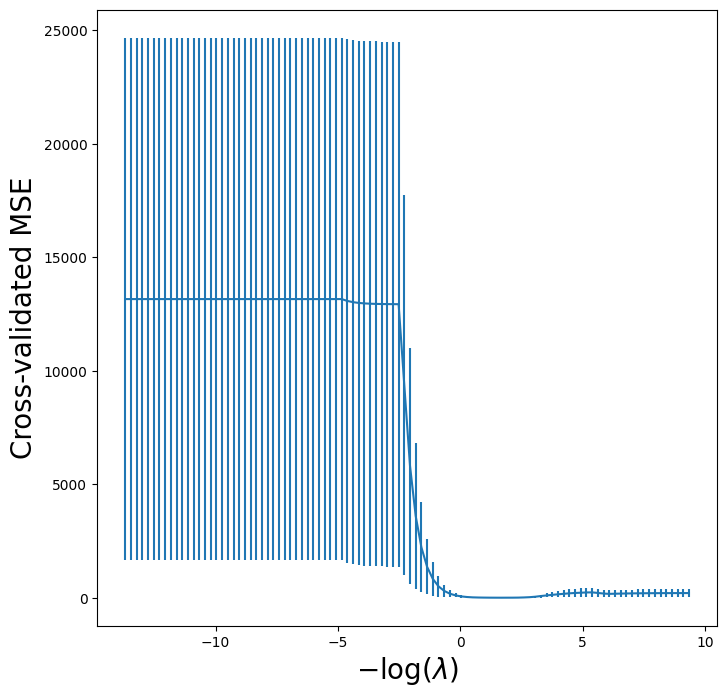

In [377]:
lasso_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [378]:
grid_r2=skm.GridSearchCV(pipe,param_grid,cv=kfold)
grid_r2.fit(X_poly,Y_new)


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Pipeline(step...l1_ratio=1))])
,param_grid,{'lasso__alpha': array([8.7890...78905392e-05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2588191/2204943169.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated $R^2$')

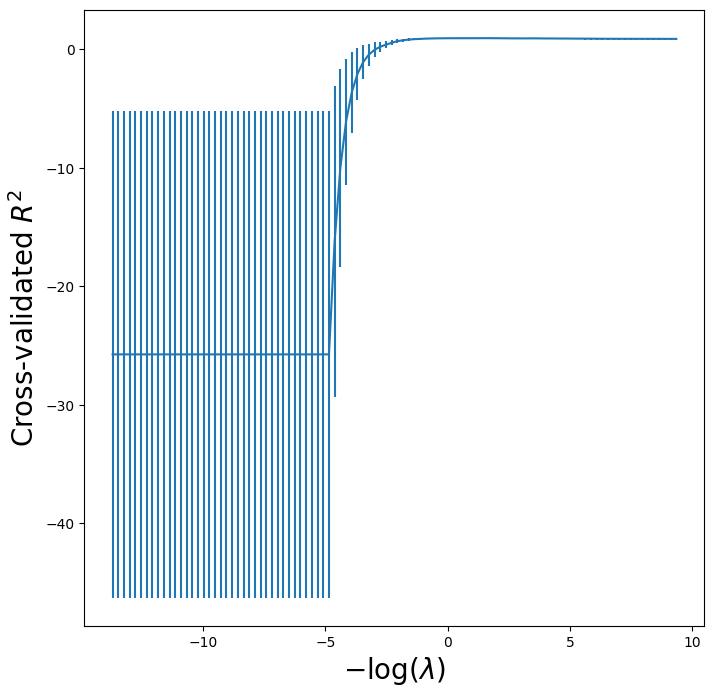

In [379]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20)

In [380]:
# 报告最优模型的系数估计
best_lasso = grid.best_estimator_.named_steps['lasso']
coefficients = pd.Series(best_lasso.coef_, index=X_poly.columns)
coefficients['intercept'] = best_lasso.intercept_

print("=" * 60)
print("最优Lasso模型结果")
print("=" * 60)
print(f"最优λ值: {grid.best_params_['lasso__alpha']:.6f}")
print(f"-log(λ): {-np.log(grid.best_params_['lasso__alpha']):.4f}")
print(f"\n系数估计:")
print(coefficients)
print(f"\n选择的变量 (非零系数):")
selected_vars = coefficients[coefficients != 0]
print(selected_vars)
print(f"\n真实模型系数: β₀=1, β7=1")

最优Lasso模型结果
最优λ值: 0.189354
-log(λ): 1.6641

系数估计:
x1           -0.281070
x2           -0.000000
x3            0.000000
x4           -0.000000
x5           16.289679
x6           -0.184192
x7           75.404812
x8           -0.000000
x9           22.346543
x10          -0.000000
intercept   -11.576214
dtype: float64

选择的变量 (非零系数):
x1           -0.281070
x5           16.289679
x6           -0.184192
x7           75.404812
x9           22.346543
intercept   -11.576214
dtype: float64

真实模型系数: β₀=1, β7=1


# 9

# In this exercise, we will predict the number of applications received using the other variables in the College data set.

# (a) TODO Split the data set into a training set and a test set

In [381]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.cross_decomposition import PLSRegression


In [382]:
College=load_data('College')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [383]:
y=College['Apps']
y

0       1660
1       2186
2       1428
3        417
4        193
       ...  
772     2197
773     1959
774     2097
775    10705
776     2989
Name: Apps, Length: 777, dtype: int64

In [384]:
X=College.drop(columns=['Apps'])
X

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [385]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
private_encoded=ohe.fit_transform(X[['Private']])

X_private=pd.DataFrame(
    private_encoded,
    columns=ohe.get_feature_names_out(['Private']),
    index=X.index
)

X=pd.concat([X.drop(columns=['Private']),X_private],axis=1)

In [386]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [387]:
X_train

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
436,3913,2181,29,57,12830,1658,5336,3344,800,3100,84,92,15.3,14,6433,48,0.0
230,813,248,40,64,850,80,15588,6174,500,1200,78,90,9.2,34,16623,77,1.0
118,5257,2301,37,65,11755,770,8116,3610,800,1618,82,88,18.0,17,7597,73,0.0
253,721,274,52,87,954,6,8800,3195,500,1200,82,99,13.1,26,8588,63,1.0
157,508,153,12,30,460,536,12292,4934,500,500,61,61,22.2,10,8643,72,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99,1.0
192,1256,853,43,79,3957,588,5401,3144,450,1888,72,75,19.3,4,5527,50,0.0
629,803,438,20,48,1906,344,6810,3970,450,1647,67,75,15.9,26,5712,59,0.0
559,2300,585,25,69,2022,926,12170,6172,480,800,79,79,13.0,30,7495,97,1.0


In [388]:
y_train

436    4522
230    1151
118    8065
253     823
157     585
       ... 
763    4186
192    1256
629    1208
559    3646
684    3281
Name: Apps, Length: 621, dtype: int64

# (b) TODO Fit a linear model using least squares on the training set, and report the test error obtained.

In [389]:
reg=skl.LinearRegression()

reg.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [390]:
reg.coef_

array([ 1.62366321e+00, -1.04438679e+00,  5.78795265e+01, -1.80142342e+01,
        7.20626050e-02,  5.64566068e-02, -7.68791048e-02,  1.71826538e-01,
        4.33611971e-02, -1.21706499e-02, -1.05851240e+01, -3.67247432e+00,
        6.31147427e+00, -6.85785367e-01,  5.15984953e-02,  8.78165549e+00,
       -5.42518702e+02])

In [391]:
reg.intercept_

-19.040232794692656

In [392]:
reg.score(X_test,y_test)

0.8699686889981196

In [393]:
y_pred=reg.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print("Test MSE: ",test_mse)

Test MSE:  1176083.9778028764


# (c) TODO Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [394]:
lambdas=np.logspace(-10,10,50)

ridge_cv=RidgeCV(alphas=lambdas,scoring='neg_mean_squared_error',cv=5)

ridge_cv.fit(X_train,y_train)

best_alpha=ridge_cv.alpha_

y_pred=ridge_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Best alpha: {best_alpha:.4f}")
print(f"Test MSE: {test_mse:.2f}")



Best alpha: 68.6649
Test MSE: 1173792.14


# (d) TODO Fit a lasso model on the training set, with λ chosen by cross validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [395]:
lambdas=np.logspace(-10,10,50)

lasso_cv=LassoCV(alphas=lambdas,cv=5,max_iter=100000)

lasso_cv.fit(X_train,y_train)

best_alpha=lasso_cv.alpha_

y_pred=lasso_cv.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print(f"Best alpha: {best_alpha:.4f}")
print(f"Test MSE: {test_mse:.2f}")


Best alpha: 68.6649
Test MSE: 1177895.24


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.318e+08, tolerance: 6.992e+05
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+08, tolerance: 8.929e+05
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

In [396]:
lasso_cv.coef_

array([ 1.63191309e+00, -1.06141689e+00,  5.58555801e+01, -1.71053038e+01,
        8.93861402e-02,  6.32342705e-02, -1.04454959e-01,  1.51252384e-01,
        7.17321319e-03, -1.44995832e-02, -7.96211451e+00, -1.09131323e+00,
        6.90409953e+00, -1.20036222e+00,  5.37295992e-02,  7.32034868e+00,
       -0.00000000e+00])

In [397]:
tol=1e-8
nonzero=np.sum(np.abs(lasso_cv.coef_)>tol)

nonzero

16

# (e) TODO Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [398]:
pipe=Pipeline([
    ('scaler',StandardScaler(with_mean=True,with_std=True)),
    ('pca',PCA()),
    ('lr',skl.LinearRegression())
])

param_grid={'pca__n_components':np.arange(1,X_train.shape[1]+1)}

gcv=skm.GridSearchCV(pipe,param_grid=param_grid,cv=5)

gcv.fit(X_train,y_train)

best_m=gcv.best_params_['pca__n_components']

y_pred=gcv.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print(f"Best M: {best_m}")
print(f"Test MSE: {test_mse:.2f}")

    

Best M: 17
Test MSE: 1176083.98


# (f) TODO Fit a PLS model on the training set, with M chosen by cross validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [399]:
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('pls', PLSRegression())
])

param_grid = {'pls__n_components': np.arange(1, min(X_train.shape) + 1)}
gcv = skm.GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)
gcv.fit(X_train, y_train)

best_k = gcv.best_params_['pls__n_components']
test_mse = mean_squared_error(y_test, gcv.predict(X_test))

print(f"Best components: {best_k}")
print(f"Test MSE: {test_mse:.3f}")

Best components: 17
Test MSE: 1176083.978
